In [4]:
import pandas as pd

raw_df = pd.read_csv("C:/Users/pralo/AI-marketing-optimization/data/raw/Advertising Budget and Sales.csv"
                     )
raw_df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df = raw_df.copy()
df = df.drop(columns=["Unnamed: 0"])

df = df.rename(columns={
    "TV Ad Budget ($)": "display_ads",
    "Radio Ad Budget ($)": "social_ads",
    "Newspaper Ad Budget ($)": "affiliate_ads",
    "Sales ($)": "GMV"
})

In [6]:
df["week"] = pd.date_range(
    start = "2022-01-02",
    periods = len(df),
    freq = "W"
)

In [7]:
df = df.sort_values("week")
df.head()

,display_ads,social_ads,affiliate_ads,GMV,week
0,230.1,37.8,69.2,22.1,2022-01-02
1,44.5,39.3,45.1,10.4,2022-01-09
2,17.2,45.9,69.3,9.3,2022-01-16
3,151.5,41.3,58.5,18.5,2022-01-23
4,180.8,10.8,58.4,12.9,2022-01-30


In [9]:
df.to_csv(
    "C:/Users/pralo/AI-marketing-optimization/data/cleaned/mmm_eda_ready.csv",
    index=False
)



In [11]:
import pandas as pd
df = pd.read_csv("C:/Users/pralo/AI-marketing-optimization/data/cleaned/mmm_eda_ready.csv")
df.head()

,display_ads,social_ads,affiliate_ads,GMV,week
0,230.1,37.8,69.2,22.1,2022-01-02
1,44.5,39.3,45.1,10.4,2022-01-09
2,17.2,45.9,69.3,9.3,2022-01-16
3,151.5,41.3,58.5,18.5,2022-01-23
4,180.8,10.8,58.4,12.9,2022-01-30


In [12]:
df.shape

(200, 5)

In [15]:
df.columns

Index(['display_ads', 'social_ads', 'affiliate_ads', 'GMV', 'week'], dtype='object')

In [16]:
df.isna().sum()

display_ads      0
social_ads       0
affiliate_ads    0
GMV              0
week             0
dtype: int64

In [17]:
df.describe()

,display_ads,social_ads,affiliate_ads,GMV
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


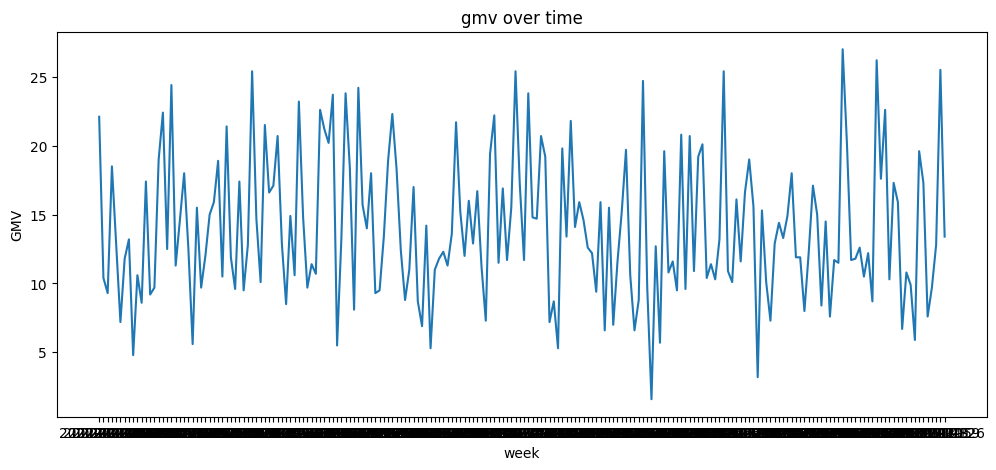

In [19]:
#GMV over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(df["week"], df["GMV"])
plt.title("gmv over time")
plt.xlabel("week")
plt.ylabel("GMV")
plt.show()

OBSERVATION: GMV shows high week-to-week volatility with no clear long-term trend or seasonality.

INTERPRETATION: This behavior is expected given the synthetic nature of the dataset and the absence of explicit temporal drivers. The variability highlights the importance of modeling noise and uncertainty rather than relying on trend-based forecasting.

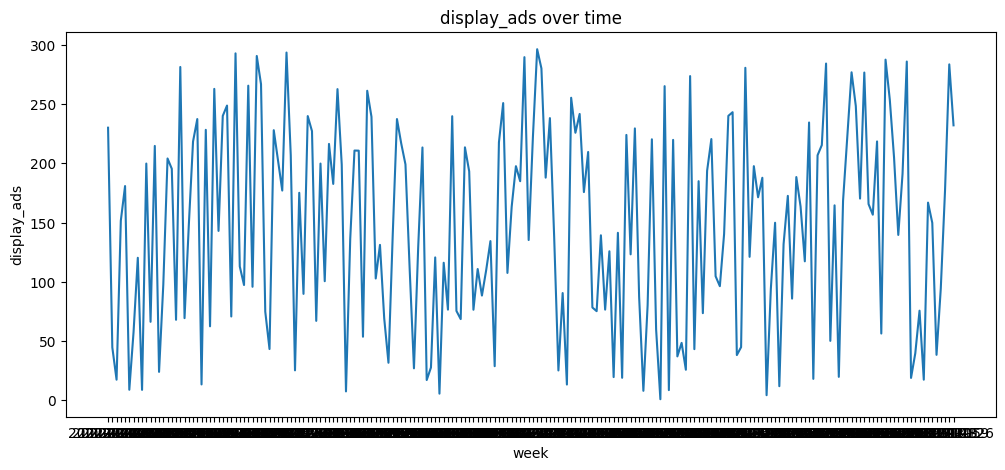

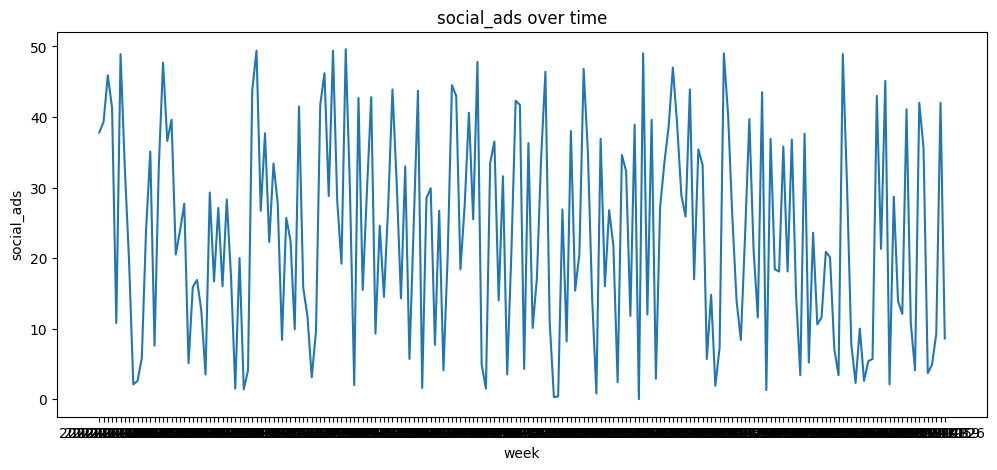

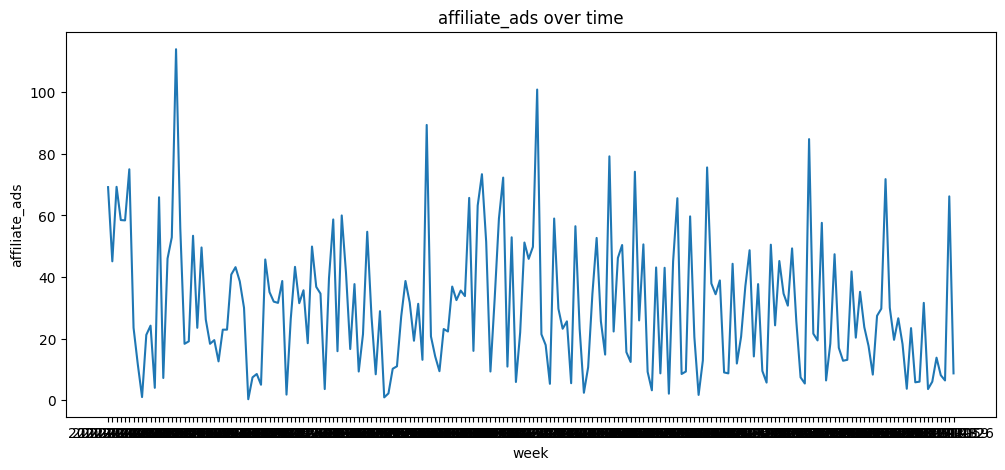

In [21]:
channels = ["display_ads", "social_ads", "affiliate_ads"]
for ch in channels:
    plt.figure(figsize=(12, 5))
    plt.plot(df["week"], df[ch])
    plt.title(f"{ch} over time")
    plt.xlabel("week")
    plt.ylabel(ch)
    plt.show()

EDA Summary:

All marketing channels display high variability and lack strong temporal trends, reflecting the synthetic nature of the dataset. The heterogeneity in spending patterns across channels motivates the use of models that can capture non-linear effects, delayed impact (adstock), and diminishing returns rather than simple linear relationships.